### 导数和微分

In [18]:
%matplotlib inline
import numpy as np
from IPython import display
from d2l import torch as d2l
import warnings
warnings.filterwarnings("ignore")

# 定义 𝑢=𝑓(𝑥)=3𝑥^2−4𝑥 
def f(x):
    return 3 * x ** 2 - 4 * x

In [19]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [20]:
def use_svg_display():  #@save
    """使用svg格式在Jupyter中显示绘图。"""
    display.set_matplotlib_formats('svg')

In [21]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """设置matplotlib的图表大小。"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [22]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴。"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [35]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(8, 6), axes=None):
    """绘制数据点。"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果 `X` 有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

[array([ 0.  , -0.37, -0.68, -0.93, -1.12, -1.25, -1.32, -1.33, -1.28,
       -1.17, -1.  , -0.77, -0.48, -0.13,  0.28,  0.75,  1.28,  1.87,
        2.52,  3.23,  4.  ,  4.83,  5.72,  6.67,  7.68,  8.75,  9.88,
       11.07, 12.32, 13.63]), array([-3. , -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. ,
       -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,
        1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8])]


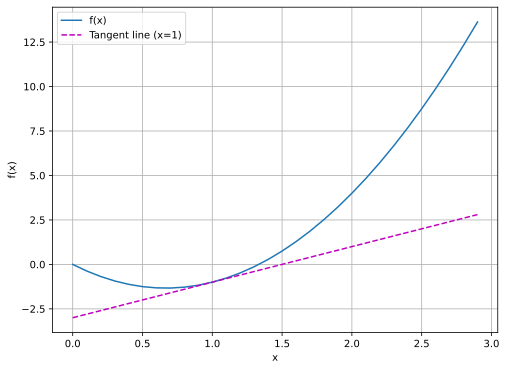

In [33]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

### 作业

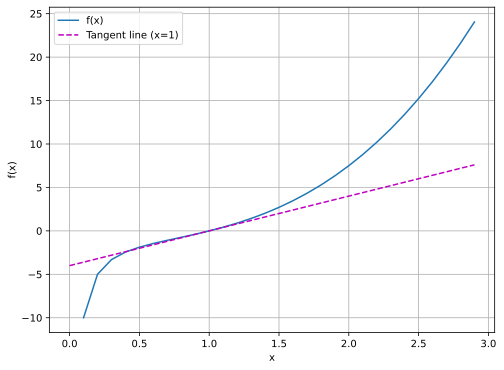

In [36]:
# 1.绘制函数 𝑦=𝑓(𝑥)=𝑥^3−1𝑥 和其在 𝑥=1 处切线的图像
plot(x, [x**3-1/x, 4*x-4], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

In [37]:
# 2.求函数 𝑓(𝐱)=3𝑥21+5𝑒^𝑥2 的梯度
# [6x1, 5e^(x_2)]

In [38]:
# 3. 函数 𝑓(𝐱)=‖𝐱‖2 的梯度是什么？
# x/‖𝐱‖2

In [ ]:
# 4.你可以写出函数 𝑢=𝑓(𝑥,𝑦,𝑧) ，其中 𝑥=𝑥(𝑎,𝑏) ， 𝑦=𝑦(𝑎,𝑏) ， 𝑧=𝑧(𝑎,𝑏) 的链式法则吗?
